In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd 
import datetime
import random
# data processing, CSV file I/O (e.g. pd.read_csv)

#importing visualization lib.
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import plotly


#stas and model
from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import norm,skew
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Sample_submission.xlsx', 'Data_Train.xlsx', 'Data_Test.xlsx']


In [2]:
train = pd.read_excel('../input/Data_Train.xlsx')
test = pd.read_excel('../input/Data_Test.xlsx')

train.shape, test.shape

((6019, 13), (1234, 12))

In [3]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


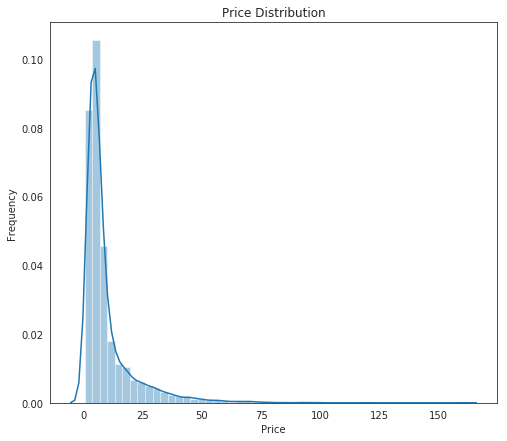

In [4]:
sns.set_style("white")
sns.set_color_codes(palette="deep")
f,ax= plt.subplots(figsize = (8,7))
sns.distplot(train['Price'])
ax.set(xlabel='Price')
ax.set(ylabel='Frequency')
ax.set(title = 'Price Distribution')
plt.show()

* Price is majorly right skewed
finding the skewness and kurtiosis

In [5]:
print('Skewness = %f' %train['Price'].skew())
print('Kurtiosis = %f' %train['Price'].kurt())

Skewness = 3.335232
Kurtiosis = 17.092202


In [6]:
train['Price'].describe()

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

In [7]:
log_train = np.log1p(train['Price'])
log_train.describe()

count    6019.000000
mean        2.018429
std         0.748221
min         0.364643
25%         1.504077
50%         1.893112
75%         2.393339
max         5.081404
Name: Price, dtype: float64

So we'll go with Log transformations only

In [8]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


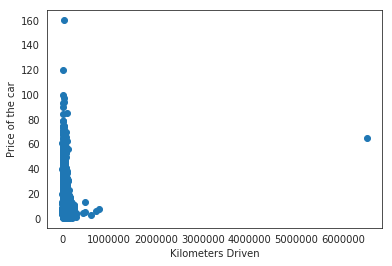

In [9]:
fig,ax = plt.subplots()
ax.scatter(x = train['Kilometers_Driven'], y = train['Price'])
plt.ylabel('Price of the car')
plt.xlabel('Kilometers Driven')
plt.show()

In [10]:
#deleting outliers 
train = train.drop(train[(train['Kilometers_Driven']>5000000) & (train['Price']<100)].index)
train = train.drop(train[(train['Kilometers_Driven']<200000) & (train['Price']>120)].index)


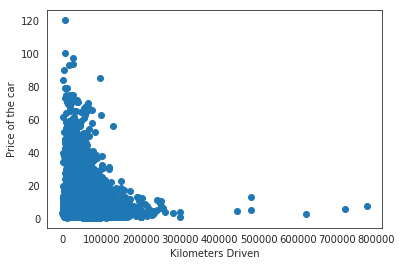

In [11]:
fig,ax = plt.subplots()
ax.scatter(x = train['Kilometers_Driven'], y = train['Price'])
plt.ylabel('Price of the car')
plt.xlabel('Kilometers Driven')
plt.show()

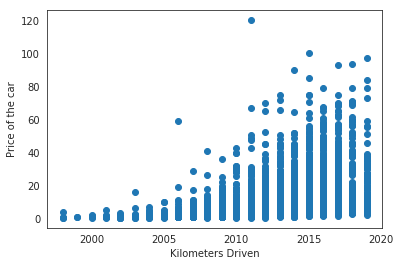

In [12]:
fig,ax = plt.subplots()
ax.scatter(x = train['Year'], y = train['Price'])
plt.ylabel('Price of the car')
plt.xlabel('Kilometers Driven')
plt.show()

TARGET VARIABLE


 mu = 9.45 and sigma = 11.00



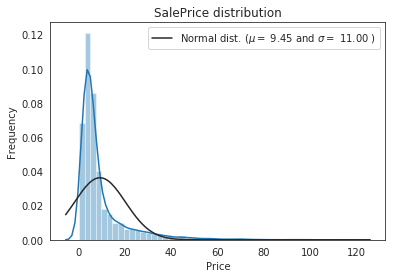

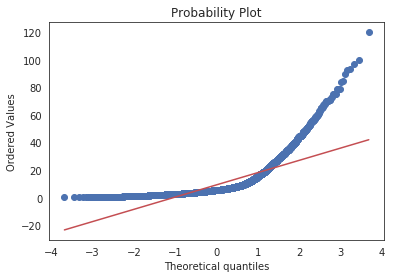

In [13]:
sns.distplot(train['Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Price'], plot=plt)
plt.show()


 mu = 2.02 and sigma = 0.75



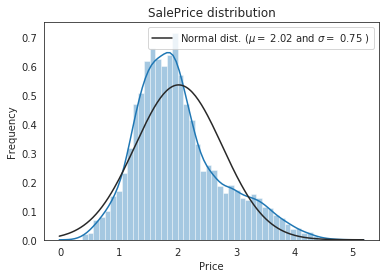

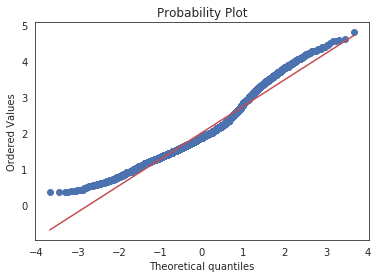

In [14]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["Price"] = np.log1p(train["Price"])

#Check the new distribution 
sns.distplot(train['Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Price'], plot=plt)
plt.show()

In [15]:
y_train = train['Price'].values
all_data= pd.concat((train,test)).reset_index(drop = True)
all_data.drop(['Price'], axis = 1, inplace = True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [16]:
all_data.shape

(7251, 12)

Missing data check

In [17]:
all_data_na = (all_data.isnull().sum()/len(all_data))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({"Missing ratio ": all_data_na})
missing_data.head(20)

,Missing ratio
New_Price,86.139843
Seats,0.730934
Power,0.634395
Engine,0.634395
Mileage,0.027582


Text(0, 0.5, 'Missing percentages')

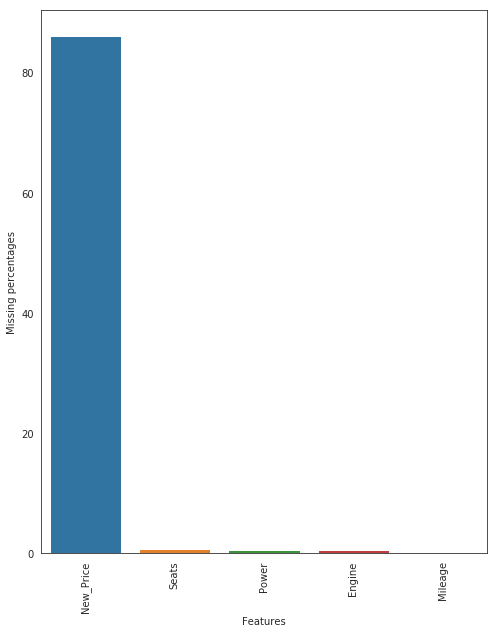

In [18]:
f,ax = plt.subplots(figsize =(8,10))
plt.xticks(rotation = '90')
sns.barplot(x = all_data_na.index, y = all_data_na)
plt.xlabel("Features")
plt.ylabel("Missing percentages")

dropping the new_price column and  adding the mode to rest other columns.

In [19]:
all_data.drop(['New_Price'], axis = 1, inplace = True)

In [20]:
all_data.head()

,Engine,Fuel_Type,Kilometers_Driven,Location,Mileage,Name,Owner_Type,Power,Seats,Transmission,Year
0,998 CC,CNG,72000,Mumbai,26.6 km/kg,Maruti Wagon R LXI CNG,First,58.16 bhp,5.0,Manual,2010
1,1582 CC,Diesel,41000,Pune,19.67 kmpl,Hyundai Creta 1.6 CRDi SX Option,First,126.2 bhp,5.0,Manual,2015
2,1199 CC,Petrol,46000,Chennai,18.2 kmpl,Honda Jazz V,First,88.7 bhp,5.0,Manual,2011
3,1248 CC,Diesel,87000,Chennai,20.77 kmpl,Maruti Ertiga VDI,First,88.76 bhp,7.0,Manual,2012
4,1968 CC,Diesel,40670,Coimbatore,15.2 kmpl,Audi A4 New 2.0 TDI Multitronic,Second,140.8 bhp,5.0,Automatic,2013


In [21]:
all_data.dtypes

Engine                object
Fuel_Type             object
Kilometers_Driven      int64
Location              object
Mileage               object
Name                  object
Owner_Type            object
Power                 object
Seats                float64
Transmission          object
Year                   int64
dtype: object

In [22]:
all_data['Engine'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
all_data['Power'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
all_data['Mileage'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [23]:
all_data.head()

,Engine,Fuel_Type,Kilometers_Driven,Location,Mileage,Name,Owner_Type,Power,Seats,Transmission,Year
0,998,CNG,72000,Mumbai,266,Maruti Wagon R LXI CNG,First,5816,5.0,Manual,2010
1,1582,Diesel,41000,Pune,1967,Hyundai Creta 1.6 CRDi SX Option,First,1262,5.0,Manual,2015
2,1199,Petrol,46000,Chennai,182,Honda Jazz V,First,887,5.0,Manual,2011
3,1248,Diesel,87000,Chennai,2077,Maruti Ertiga VDI,First,8876,7.0,Manual,2012
4,1968,Diesel,40670,Coimbatore,152,Audi A4 New 2.0 TDI Multitronic,Second,1408,5.0,Automatic,2013


In [24]:
all_data['Fuel_Type'] = all_data['Fuel_Type'].apply(str)
all_data['Engine'] = pd.to_numeric(all_data['Engine'])
all_data['Mileage'] = pd.to_numeric(all_data['Mileage'])
all_data['Power'] = pd.to_numeric(all_data['Power'])
all_data['Seats'] = all_data['Seats'].apply(str)
all_data['Year'] = all_data['Year'].apply(str)


0.719 

In [25]:
vlist = ['CNG', 'LPG']
CNG = all_data[all_data['Fuel_Type'].isin(vlist)]
CNG['Mileage'] = CNG['Mileage']*0.719
CNG.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Engine,Fuel_Type,Kilometers_Driven,Location,Mileage,Name,Owner_Type,Power,Seats,Transmission,Year
0,998.0,CNG,72000,Mumbai,191.254,Maruti Wagon R LXI CNG,First,5816.0,5.0,Manual,2010
5,814.0,LPG,75000,Hyderabad,151.709,Hyundai EON LPG Era Plus Option,First,552.0,5.0,Manual,2012
127,998.0,CNG,89900,Pune,191.254,Maruti Wagon R LXI CNG,First,5816.0,5.0,Manual,2013
328,998.0,CNG,42496,Pune,189.097,Maruti Zen Estilo LXI Green (CNG),First,671.0,5.0,Manual,2008
440,1196.0,CNG,31841,Kochi,108.569,Maruti Eeco 5 STR With AC Plus HTR CNG,First,73.0,5.0,Manual,2017


In [26]:
all_data.update(CNG)
all_data.head()

,Engine,Fuel_Type,Kilometers_Driven,Location,Mileage,Name,Owner_Type,Power,Seats,Transmission,Year
0,998.0,CNG,72000.0,Mumbai,191.254,Maruti Wagon R LXI CNG,First,5816.0,5.0,Manual,2010
1,1582.0,Diesel,41000.0,Pune,1967.000,Hyundai Creta 1.6 CRDi SX Option,First,1262.0,5.0,Manual,2015
2,1199.0,Petrol,46000.0,Chennai,182.000,Honda Jazz V,First,887.0,5.0,Manual,2011
3,1248.0,Diesel,87000.0,Chennai,2077.000,Maruti Ertiga VDI,First,8876.0,7.0,Manual,2012
4,1968.0,Diesel,40670.0,Coimbatore,152.000,Audi A4 New 2.0 TDI Multitronic,Second,1408.0,5.0,Automatic,2013


In [27]:
all_data["Engine"] = all_data["Engine"].transform(
    lambda x: x.fillna(x.median()))
all_data["Power"] = all_data["Power"].transform(
    lambda x: x.fillna(x.median()))
all_data["Seats"] = all_data["Seats"].transform(
    lambda x: x.fillna(x.mode()))
all_data["Mileage"] = all_data["Mileage"].transform(
    lambda x: x.fillna(x.median()))


In [28]:
all_data_na = (all_data.isnull().sum()/len(all_data))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({"Missing ratio ": all_data_na})
missing_data.head(20)

,Missing ratio


In [29]:
from sklearn.preprocessing import LabelEncoder

cols = ('Owner_Type', 'Seats', 'Year', 'Transmission')
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))


all_data.drop(['Name'], axis = 1, inplace = True)
all_data.head()


,Engine,Fuel_Type,Kilometers_Driven,Location,Mileage,Owner_Type,Power,Seats,Transmission,Year
0,998.0,CNG,72000.0,Mumbai,191.254,0,5816.0,4,1,13
1,1582.0,Diesel,41000.0,Pune,1967.000,0,1262.0,4,1,18
2,1199.0,Petrol,46000.0,Chennai,182.000,0,887.0,4,1,14
3,1248.0,Diesel,87000.0,Chennai,2077.000,0,8876.0,6,1,15
4,1968.0,Diesel,40670.0,Coimbatore,152.000,2,1408.0,4,0,16


In [30]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Power,5.478308
Kilometers_Driven,3.831826
Seats,2.320350
Owner_Type,1.801203
Engine,1.421383
Mileage,0.650317
Year,-0.836683
Transmission,-0.967268


Applying box cox transformation of highly skewed features

In [31]:
skewness = skewness[skewness >2]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 8 skewed numerical features to Box Cox transform


In [32]:
final_data = pd.get_dummies(data=all_data, columns=['Fuel_Type', 'Location'])
#final_data = pd.get_dummies(all_data)
final_data.head()

,Engine,Kilometers_Driven,Mileage,Owner_Type,Power,Seats,Transmission,Year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,12.119733,29.020291,8.005358,0.000000,17.802186,1.820334,0.730463,3.237728,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,13.462736,26.129864,14.130899,0.000000,12.792276,1.820334,0.730463,3.701973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.643496,26.700846,7.897190,0.000000,11.790740,1.820334,0.730463,3.340760,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,12.759768,30.047813,14.301264,0.000000,19.403792,2.259674,0.730463,3.438110,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,14.132484,26.090133,7.511251,1.194318,13.114203,1.820334,0.000000,3.530419,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [33]:
ntrain = train.shape[0]
ntest = test.shape[0]
train = final_data[:ntrain]
test = final_data[ntrain:]

**Modelling**

In [34]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [35]:
#Validation function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [36]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [37]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [38]:
KRR = KernelRidge(alpha=0.6, kernel='linear', degree=2, coef0=2.5)

In [39]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [40]:
model_xgb = xgb.XGBRegressor(learning_rate=0.05, max_depth=3, 
                             n_estimators=3000
                            )

In [41]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.02, n_estimators=3000)

In [42]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.3015 (0.0094)



In [43]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.3015 (0.0094)



In [44]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.3036 (0.0077)



In [45]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1785 (0.0150)



In [46]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[15:08:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:08:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:08:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:08:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:09:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:09:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:09:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:09:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [47]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1945 (0.0122)



In [48]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [49]:
averaged_models = AveragingModels(models = (ENet, GBoost, model_lgb,model_xgb))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[15:11:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:11:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:12:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:12:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:13:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:13:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:14:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:14:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [50]:

class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [51]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1803 (0.0147)


In [52]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [53]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.13029655305270188


XGBOOST


In [54]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

[15:29:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.10446069124870488


LIGHT GBM

In [55]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.1644258152082338


In [56]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.10 +
               xgb_train_pred*0.80 + lgb_train_pred*0.10 ))

RMSLE score on train data:
0.10890990063022593


In [57]:
ensemble = stacked_pred*0.15 + xgb_pred*0.70 + lgb_pred*0.15

In [58]:
sub = pd.DataFrame()
sub['Price'] = ensemble
sub.to_csv('submission.csv',index=False)